# Experiment 4.4: Filtering Module

## 1. Enviornment

In the following cell, change assign WD the path to the BMT-Clipping repository. 
Additionally, assign the path to your environments directory (e.g. where conda stores all directories) to the ENVS_PATH variable.

In [1]:
# Working directory (it must be the repository's root directory)
WD = '/home/A01630791/BMT-Clipping'
%cd $WD

# Environments directory (e.g. anaconda3/envs)
ENVS_PATH = '/home/A01630791/anaconda3/envs'

/home/A01630791/BMT-Clipping


**Module imports**

In [2]:
from clipping_modules.filtering import FilteringModule
from clipping_modules.clipping import ClippingModule

**Other imports**

In [3]:
import json, re, collections
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pytube import YouTube

## 2. Importing the dataset

We will be importing two files:
- output from BMT with fixed-window clipping
- output from BMT with scene-detection clipping

**Fixed-window clipping**

In [4]:
# fixed-window clipping
FT_OUTPUT_PATH = '/home/A01630791/bmt_clipping_experiments/Output_4_3/4_3_bmt_captions_save.json'

ft_output = pd.read_json(FT_OUTPUT_PATH, orient='records')
ft_output['number_captions'] = [len(sample.captions) for index, sample in ft_output.iterrows()]
ft_output.head()

,captions,clip_id,duration,video_id,number_captions
0,"[{'start': 0.5, 'end': 16.1, 'sentence': 'A pe...",120,34.935,zvSbF0dKQM8,2
1,"[{'start': 0.0, 'end': 31.7, 'sentence': 'A pe...",180,34.877,zvSbF0dKQM8,2
2,"[{'start': 0.4, 'end': 28.7, 'sentence': 'A ma...",240,34.807,zvSbF0dKQM8,3
3,"[{'start': 28.6, 'end': 29.0, 'sentence': 'A m...",270,34.802,zvSbF0dKQM8,5
4,"[{'start': 28.4, 'end': 30.0, 'sentence': 'A m...",330,34.735,zvSbF0dKQM8,5


In [5]:
# Obtain number of captions (add no. of captions of every clip together)
ft_num_captions_no_filtering = ft_output.groupby(by="video_id").number_captions.sum()
ft_num_captions_no_filtering.rename("number_captions_no_filtering", inplace=True)

video_id
0RqBZlDur5k    130
0dyQouKDR2M    125
3X7OqTDi8NQ    147
3oWlYHKMyv8    141
BM-QYaXThUg    125
DAlNWRjXY4A     87
FJ64K9QdwDU    173
LlBedonOnR0    143
_VWAFXFRTcA    153
zvSbF0dKQM8    137
Name: number_captions_no_filtering, dtype: int64

**Scene detection clipping**

In [6]:
# scene detection clipping
SD_OUTPUT_PATH = '/home/A01630791/bmt_clipping_experiments/Output_4_3/4_3_bmt_captions_ps_save.json'

sd_output = pd.read_json(SD_OUTPUT_PATH, orient='records')
sd_output['number_captions'] = [len(sample.captions) for index, sample in sd_output.iterrows()]
sd_output.head()

,captions,clip_id,duration,video_id,number_captions
0,"[{'start': 0.0, 'end': 2.1, 'sentence': 'A man...",1,15.057,DAlNWRjXY4A,3
1,"[{'start': 0.0, 'end': 1.8, 'sentence': 'A wom...",2,12.690,DAlNWRjXY4A,2
2,"[{'start': 0.4, 'end': 1.8, 'sentence': 'A wom...",3,4.390,DAlNWRjXY4A,2
3,"[{'start': 0.0, 'end': 3.7, 'sentence': 'A per...",4,45.657,DAlNWRjXY4A,3
4,"[{'start': 0.0, 'end': 2.1, 'sentence': 'A per...",7,4.890,DAlNWRjXY4A,2


In [7]:
# Obtain number of captions (add no. of captions of every clip together)
sd_num_captions_no_filtering = sd_output.groupby(by="video_id").number_captions.sum()
sd_num_captions_no_filtering.rename("number_captions_no_filtering", inplace=True)

video_id
0RqBZlDur5k     34
0dyQouKDR2M    323
3X7OqTDi8NQ    436
3oWlYHKMyv8     20
DAlNWRjXY4A     62
FJ64K9QdwDU      5
LlBedonOnR0    238
_VWAFXFRTcA     43
Name: number_captions_no_filtering, dtype: int64

We observe two `video_id`s are missing when compared to fixed-window-clipping's results (`BM-QYaXThUg` and `zvSbF0dKQM8`). These videos were not converted into subclips by the clipping module because no scene changes were found.

## 3. Filtering (fixed-window clipping results)

In [8]:
# filtering module instance
fm = FilteringModule()

In [102]:
# define the output path 1 (fixed window)
FM_OUTPUT_PATH_1 = '/home/A01630791/bmt_clipping_experiments/Output_4_4/4_4_filtered_captions1.json'

with open(FM_OUTPUT_PATH_1, 'w') as f:
    # f.write('[]')
    pass

In [13]:
# filter file
fm.filter_file(
    input_path=FT_OUTPUT_PATH,
    output_path=FM_OUTPUT_PATH_1,
    tiempo=120
)

In [129]:
fm_results_df = pd.read_json(FM_OUTPUT_PATH_1, orient='records')
fm_results_df = pd.merge(
    how="left", 
    left=fm_results_df, 
    right=ft_num_captions_no_filtering, 
    left_on='video_id', 
    right_on='video_id',
)
fm_results_df.head()

,captions,duration,video_id,number_captions_no_filtering
0,"[{'start': 3600.0, 'end': 3616.1, 'sentence': ...",1116.592,zvSbF0dKQM8,137
1,"[{'start': 43228.0, 'end': 43229.8, 'sentence'...",1180.979,0RqBZlDur5k,130
2,"[{'start': 111616.4, 'end': 111621.5, 'sentenc...",1035.102,DAlNWRjXY4A,87
3,"[{'start': 104400.1, 'end': 104410.1, 'sentenc...",1101.893,_VWAFXFRTcA,153
4,"[{'start': 43228.6, 'end': 43230.1, 'sentence'...",1235.941,0dyQouKDR2M,125


In [130]:
fm_results_df['number_captions'] = [len(sample.captions) for index, sample in fm_results_df.iterrows()]

In [131]:
average_clip_captions = ft_output.groupby(by='video_id').number_captions.mean()
average_clip_captions.rename("avg_clip_captions", inplace=True)
fm_results_df = pd.merge(fm_results_df, average_clip_captions, how='left', on='video_id')

In [132]:
fm_results_df.sort_values(by='duration', inplace=True)
fm_results_df.head()

,captions,duration,video_id,number_captions_no_filtering,number_captions,avg_clip_captions
2,"[{'start': 111616.4, 'end': 111621.5, 'sentenc...",1035.102,DAlNWRjXY4A,87,47,2.718750
3,"[{'start': 104400.1, 'end': 104410.1, 'sentenc...",1101.893,_VWAFXFRTcA,153,50,4.250000
0,"[{'start': 3600.0, 'end': 3616.1, 'sentence': ...",1116.592,zvSbF0dKQM8,137,72,4.151515
1,"[{'start': 43228.0, 'end': 43229.8, 'sentence'...",1180.979,0RqBZlDur5k,130,85,3.513514
4,"[{'start': 43228.6, 'end': 43230.1, 'sentence'...",1235.941,0dyQouKDR2M,125,66,3.289474


In [153]:
# mean decrease
diff_captions = fm_results_df.number_captions_no_filtering - fm_results_df.number_captions
diff_captions_percentage = diff_captions / fm_results_df.number_captions_no_filtering * 100
diff_captions_percentage.mean()

49.601379087571885

(-1, 10)

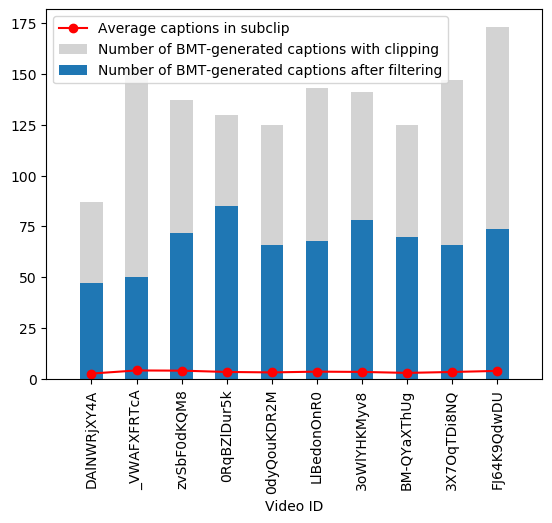

In [158]:
ax = fm_results_df.plot(kind="bar", x="video_id", y="number_captions_no_filtering", color="lightgray", rot=90)
fm_results_df.plot(kind="bar", x="video_id", y="number_captions", rot=90, ax=ax)
fm_results_df.plot(kind="line", x="video_id", y="avg_clip_captions", color="red", marker='o', ax=ax, rot=90)
ax.legend([
    'Average captions in subclip', 
    'Number of BMT-generated captions with clipping', 
    'Number of BMT-generated captions after filtering'
])
ax.set_xlabel('Video ID')
ax.set_xlim(-1, 10)

In [154]:
PLOT_SAVE_PATH = '/home/A01630791/bmt_clipping_experiments/Output_4_4'

fig = ax.get_figure()
fig.savefig(f'{PLOT_SAVE_PATH}/3_1.png', dpi=300, bbox_inches='tight')

The previous chart displays the number of captions for each video in a subset of 10 videos from LABC after clipping and also after filtering. A plot of the average number captions of subclips for any given video is shown in red. The vidos are sorted from shorter duration (left) to larger duration (right). We note that the videos lose an average of 49.6% of the captions the had before filtering. 

## 4. Filtering (scene detection clipping results)

In [8]:
# filtering module instance
fm = FilteringModule()

In [9]:
# define the output path 2 (scene detection)
FM_OUTPUT_PATH_2 = '/home/A01630791/bmt_clipping_experiments/Output_4_4/4_4_filtered_captions2.json'

with open(FM_OUTPUT_PATH_2, 'w') as f:
    f.write('[]')

In [ ]:
# filter file
fm.filter_file(
    input_path=SD_OUTPUT_PATH,
    output_path=FM_OUTPUT_PATH_2,
)

In [129]:
fm_results_df = pd.read_json(FM_OUTPUT_PATH_1, orient='records')
fm_results_df = pd.merge(
    how="left", 
    left=fm_results_df, 
    right=ft_num_captions_no_filtering, 
    left_on='video_id', 
    right_on='video_id',
)
fm_results_df.head()

,captions,duration,video_id,number_captions_no_filtering
0,"[{'start': 3600.0, 'end': 3616.1, 'sentence': ...",1116.592,zvSbF0dKQM8,137
1,"[{'start': 43228.0, 'end': 43229.8, 'sentence'...",1180.979,0RqBZlDur5k,130
2,"[{'start': 111616.4, 'end': 111621.5, 'sentenc...",1035.102,DAlNWRjXY4A,87
3,"[{'start': 104400.1, 'end': 104410.1, 'sentenc...",1101.893,_VWAFXFRTcA,153
4,"[{'start': 43228.6, 'end': 43230.1, 'sentence'...",1235.941,0dyQouKDR2M,125


In [130]:
fm_results_df['number_captions'] = [len(sample.captions) for index, sample in fm_results_df.iterrows()]

In [131]:
average_clip_captions = ft_output.groupby(by='video_id').number_captions.mean()
average_clip_captions.rename("avg_clip_captions", inplace=True)
fm_results_df = pd.merge(fm_results_df, average_clip_captions, how='left', on='video_id')

In [132]:
fm_results_df.sort_values(by='duration', inplace=True)
fm_results_df.head()

,captions,duration,video_id,number_captions_no_filtering,number_captions,avg_clip_captions
2,"[{'start': 111616.4, 'end': 111621.5, 'sentenc...",1035.102,DAlNWRjXY4A,87,47,2.718750
3,"[{'start': 104400.1, 'end': 104410.1, 'sentenc...",1101.893,_VWAFXFRTcA,153,50,4.250000
0,"[{'start': 3600.0, 'end': 3616.1, 'sentence': ...",1116.592,zvSbF0dKQM8,137,72,4.151515
1,"[{'start': 43228.0, 'end': 43229.8, 'sentence'...",1180.979,0RqBZlDur5k,130,85,3.513514
4,"[{'start': 43228.6, 'end': 43230.1, 'sentence'...",1235.941,0dyQouKDR2M,125,66,3.289474


In [153]:
# mean decrease
diff_captions = fm_results_df.number_captions_no_filtering - fm_results_df.number_captions
diff_captions_percentage = diff_captions / fm_results_df.number_captions_no_filtering * 100
diff_captions_percentage.mean()

49.601379087571885

(-1, 10)

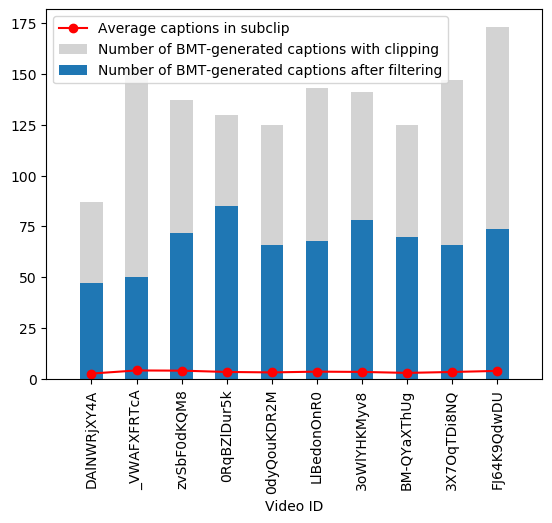

In [158]:
ax = fm_results_df.plot(kind="bar", x="video_id", y="number_captions_no_filtering", color="lightgray", rot=90)
fm_results_df.plot(kind="bar", x="video_id", y="number_captions", rot=90, ax=ax)
fm_results_df.plot(kind="line", x="video_id", y="avg_clip_captions", color="red", marker='o', ax=ax, rot=90)
ax.legend([
    'Average captions in subclip', 
    'Number of BMT-generated captions with clipping', 
    'Number of BMT-generated captions after filtering'
])
ax.set_xlabel('Video ID')
ax.set_xlim(-1, 10)

In [154]:
PLOT_SAVE_PATH = '/home/A01630791/bmt_clipping_experiments/Output_4_4'

fig = ax.get_figure()
fig.savefig(f'{PLOT_SAVE_PATH}/3_1.png', dpi=300, bbox_inches='tight')

The previous chart displays the number of captions for each video in a subset of 10 videos from LABC after clipping and also after filtering. A plot of the average number captions of subclips for any given video is shown in red. The vidos are sorted from shorter duration (left) to larger duration (right). We note that the videos lose an average of 49.6% of the captions the had before filtering. 